<a href="https://colab.research.google.com/github/rhuancborges/praticas-programacaoMatematica/blob/main/problema1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade Prática 2 (AP2)
### GCC118 - Programação Matemática


**Nome**: Rhuan Campideli Borges (202210075)

**Turma**: 10A





# Enunciado - Problema 1

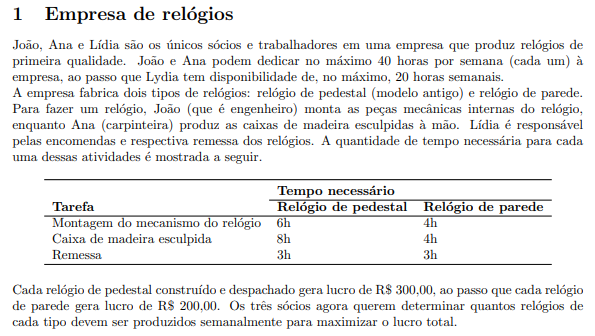

# 1 - Modelagem Matemática e resolução

## Dados
Para iniciar nossa modelagem, podemos retirar do enunciado do problema alguns dados importantes:

*  L -> lucros obtidos pela venda de cada um dos relógios;
*  D -> disponibilidade (em horas) semanal de cada funcionário;
*  $a_{ij}$ -> quantidade em horas para fazer a tarefa $i$ relacionada ao tipo de relógio $j$

**Vetor de lucro ($L$)**:
$$
\mathbf{L} = \begin{pmatrix} 300 \\ 200 \end{pmatrix}
$$

**Vetor de disponibilidade semanal ($D$)**:
$$
\mathbf{D} = \begin{pmatrix} 40 \\ 40 \\ 20 \end{pmatrix}
$$

**Matriz de tarefas e tempo ($A$)**:
$$
\mathbf{A} = \begin{pmatrix} 6 & 4 \\ 8 & 4 \\ 3 & 3 \end{pmatrix}
$$

\\

## Variáveis de decisão
As variáveis do problema (e também aquilo que queremos determinar) é a quantidade de cada tipo de relógio a ser produzido. Sendo assim, tem-se:

**Vetor de variáveis ($x$)**:
$$
\mathbf{x} = \begin{pmatrix} x_1 \\ x_2  \end{pmatrix},
$$

sendo $x_1$ a quantidade de relógios de pedestal produzidos e $x_2$ a quantidade de relógios de parede produzidos.

\\

### Tipo

As variáveis são contínuas, ou seja, $x \geq 0 $.

\\

## Objetivo e função
O objetivo do problema é maximizar o lucro obtido através da produção dos relógios. Sendo assim, devemos **maximizar** a seguinte função:

$$
f(x) = L^Tx =  300x_1 + 200x_2
$$


## Restrições

As restrições do problema estão relacionadas à limitação de tempo semanal para a execução das tarefas de cada funcionário. Desse modo:

$$
Ax \leq D → \begin{pmatrix} 6 & 4 \\ 8 & 4 \\ 3 & 3 \end{pmatrix}  \begin{pmatrix} x_1 \\ x_2  \end{pmatrix} \leq \begin{pmatrix} 40 \\ 40 \\ 20 \end{pmatrix}
$$

\\

### Restrição relacionada ao funcionário João (montagem do mecanismo):
$$
6x_1 + 4x_2 \leq 40
$$

### Restrição relacionada à funcionária Ana (produção da caixa de madeira):
$$
8x_1 + 4x_2 \leq 40
$$

### Restrição relacionada à funcionária Lidia (remessa):
$$
3x_1 + 3x_2 \leq 20
$$

## Instalação da biblioteca Gurobi

In [1]:
!pip install gurobipy

## Declaração do objeto que representa o modelo

In [2]:
from gurobipy import Model, GRB

# Criar o modelo
modelo = Model("relogios")

Restricted license - for non-production use only - expires 2026-11-23


## Variáveis de decisão

In [3]:
pedestal_var = modelo.addVar(name="relogio_pedestal", vtype=GRB.CONTINUOUS, lb=0)
parede_var = modelo.addVar(name="relogio_parede", vtype=GRB.CONTINUOUS, lb=0)

## Função objetivo

In [4]:
modelo.setObjective(300 * pedestal_var + 200 * parede_var, GRB.MAXIMIZE)

## Restrições

*  Funcionário João (montagem do relógio):

In [5]:
modelo.addConstr(6 * pedestal_var + 4 * parede_var <= 40, "montagem_relogio")

<gurobi.Constr *Awaiting Model Update*>

* Funcionária Ana (montagem da caixa de madeira):

In [6]:
modelo.addConstr(8 * pedestal_var + 4 * parede_var <= 40, "montagem_caixa")

<gurobi.Constr *Awaiting Model Update*>

* Funcionária Lidia (remessa):

In [7]:
modelo.addConstr(3 * pedestal_var + 3 * parede_var <= 20, "remessa")

<gurobi.Constr *Awaiting Model Update*>

## Resolvendo o problema

In [8]:
modelo.optimize()

Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (linux64 - "Ubuntu 22.04.3 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 3 rows, 2 columns and 6 nonzeros
Model fingerprint: 0x6103ff60
Coefficient statistics:
  Matrix range     [3e+00, 8e+00]
  Objective range  [2e+02, 3e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+01, 4e+01]
Presolve time: 0.01s
Presolved: 3 rows, 2 columns, 6 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.0000000e+32   4.250000e+30   5.000000e+02      0s
       2    1.6666667e+03   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.01 seconds (0.00 work units)
Optimal objective  1.666666667e+03


## Imprimindo as soluções do problema

In [9]:
if(modelo.status == GRB.OPTIMAL):
  print(f"Relógios de pedestal: {pedestal_var.X}")
  print(f"Relógios de parede: {parede_var.X}")
  print(f"Valor ótimo do lucro: {modelo.objVal}")

Relógios de pedestal: 3.333333333333333
Relógios de parede: 3.3333333333333335
Valor ótimo do lucro: 1666.6666666666665


## 2 - Análise de sensibilidade

In [11]:
print("\nIntervalos de Lucros (Vetor de Custos):")
for variavel in modelo.getVars():
  print(f"Variável {variavel.VarName}:")
  print(f"  valor mínimo do custo (SAObjLow): {variavel.SAObjLow}")
  print(f"  valor máximo do custo (SAObjUp): {variavel.SAObjUp}")

print("\nIntervalos de Recursos (Vetor de Recursos):")
for restricao in modelo.getConstrs():
  print(f"Restrição {restricao.ConstrName}:")
  print(f"  valor mínimo do recurso (SARHSLow): {restricao.SARHSLow}")
  print(f"  valor máximo do recurso (SARHSUp): {restricao.SARHSUp}")
  print(f"  valor da variável dual associada: {restricao.Pi}")


Intervalos de Lucros (Vetor de Custos):
Variável relogio_pedestal:
  valor mínimo do custo (SAObjLow): 200.0
  valor máximo do custo (SAObjUp): 400.0
Variável relogio_parede:
  valor mínimo do custo (SAObjLow): 150.0
  valor máximo do custo (SAObjUp): 300.0

Intervalos de Recursos (Vetor de Recursos):
Restrição montagem_relogio:
  valor mínimo do recurso (SARHSLow): 33.333333333333336
  valor máximo do recurso (SARHSUp): inf
  valor da variável dual associada: 0.0
Restrição montagem_caixa:
  valor mínimo do recurso (SARHSLow): 26.666666666666668
  valor máximo do recurso (SARHSUp): 53.33333333333333
  valor da variável dual associada: 25.0
Restrição remessa:
  valor mínimo do recurso (SARHSLow): 15.0
  valor máximo do recurso (SARHSUp): 30.0
  valor da variável dual associada: 33.333333333333336


Os resultados retornados pela análise de sensibilidade indicam os valores limites tanto para os custos associados às variáveis relogio_pedestal ($x_1$) e relogio_parede ($x_2$), quanto para os recursos das restrições, de modo a manter o problema factível.

Sendo assim, para manter o problema factível:

* O lucro obtido pela venda de relógios de pedestal (que é 300,00) pode ir de 200,00 até 400,00;
* O lucro obtido pela venda de relógios de parede (que é 200,00) pode ir de 150,00 até 300,00;
* A quantidade de horas semanais que o funcionário João consegue trabalhar por semana (que é 40) pode ir de 33.33 até crescer infinitamente;
* A quantidade de horas semanais que a funcionária Ana consegue trabalhar por semana (que é 40) pode ir de 26.66 até 53.33;
* A quantidade de horas semanais que a funcionária Lidia consegue trabalhar por semana (que é 20) pode ir de 15 até 30;

## 3 - Escolha do aumento do número máximo de horas

Será escolhido o aumento no número máximo de horas semanais da **funcionária Lidia (restrição "remessa")**, pois essa restrição apresenta o maior valor de variável dual, o que gera maior impacto na função objetivo (maximização do lucro).


## 4 - Variável dual igual a zero

A variável dual relacionada à **primeira restrição (montagem_relogio)** é igual a zero. Isso significa que essa restrição não é ativa na solução ótima.

Sendo assim, é possível relaxá-la o quanto possível sem afetar a solução ótima (tanto que isso foi mostrado pelo valor de infinito como limite máximo do recurso associado a essa restrição).